## MySQL Connection Implementation

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
connection = mysql.connector.connect(
        host='localhost',
        database='bank_database',
        user='root',
        password='pramothguhan12',

    )

In [3]:
if connection.is_connected():
        db_Info = connection.get_server_info()
        print(f"Connected to MySQL Server version {db_Info}")

        
        cursor = connection.cursor()

Connected to MySQL Server version 8.0.36


In [4]:
connection

## Query Implementation

In [5]:
df = pd.read_sql_query("SELECT * FROM employee", connection)
df

C:\Users\pramo\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,EMPLOYEE ID,EMPLOYEE NAME,EMPLOYEE EMAIL,SALARY,BRANCH ID
0,555,Tonia Schermick,tschermick0@cnbc.com,5358.86,2808
1,839,Derrick Bettenay,dbettenay1@netvibes.com,7313.88,2946
2,506,Sharyl Yankov,syankov2@elpais.com,7048.32,2508
3,714,Marcella Allbones,mallbones3@bizjournals.com,7148.82,3021
4,878,Desdemona MacParlan,dmacparlan4@bigcartel.com,9672.85,4131
...,...,...,...,...,...
95,300,Colas Handrik,chandrik2n@auda.org.au,4514.90,2847
96,124,Harv Allgood,hallgood2o@mediafire.com,6186.83,4720
97,406,Claudio Hunting,chunting2p@opensource.org,6566.09,1252
98,100,Sharyl Meenehan,smeenehan2q@addthis.com,7877.04,4826


In [6]:
df = pd.read_sql_query("SELECT * FROM reward;", connection)
df.head(10)

C:\Users\pramo\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,REWARD ID,REWARD AMOUNT,REQUEST DATE,REDEMPTION OPTION,CUSTOMER ID
0,66067474,$1172.47,04/21/2022,COUPON,57849
1,15901910,$2667.44,07/29/2022,WEBSITE,42148
2,61884675,$3612.69,08-11-2023,APP,99941
3,48276456,$4060.61,04/29/2023,COUPON,37152
4,58233430,$2795.17,02-03-2023,APP,40824
5,51236128,$5175.59,01-06-2024,COUPON,82764
6,62919492,$603.09,10/31/2022,COUPON,66412
7,87440465,$3596.64,10/13/2023,COUPON,71486
8,56243724,$8769.97,05-01-2022,APP,19623
9,78616818,$4456.46,05-11-2022,COUPON,63798


In [7]:
df = pd.read_sql_query("SELECT `CUSTOMER ID`, `INCOME`, `BRANCH ID` FROM `CUSTOMER` ORDER BY `INCOME` DESC LIMIT 10;", connection)
df.head(10)

C:\Users\pramo\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CUSTOMER ID,INCOME,BRANCH ID
0,99808,$93011.26,4999
1,28273,$91975.45,2508
2,31971,$88840.39,2946
3,48478,$86338.92,4131
4,10271,$85718.19,4999
5,27260,$7856.16,2847
6,22858,$76483.65,2508
7,47870,$69730.82,2946
8,24816,$67659.02,4826
9,47555,$67461.52,4999


In [8]:
df = pd.read_sql_query("SELECT `BRANCH ID`, COUNT(`CUSTOMER ID`) AS NUMBER_OF_CUSTOMERS FROM CUSTOMER GROUP BY `BRANCH ID`;", connection)
df.head(10)

C:\Users\pramo\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,BRANCH ID,NUMBER_OF_CUSTOMERS
0,2808,10
1,2946,10
2,2508,10
3,3021,10
4,4131,10
5,2847,10
6,4720,10
7,1252,10
8,4826,10
9,4999,10


In [9]:
df = pd.read_sql_query("SELECT * FROM TRANSACTION WHERE status = 'success';", connection)
df.head(10)

C:\Users\pramo\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,TRANSACTION ID,TRANSACTION AMOUNT,TRANSACTION TIME,STATUS,CUSTOMER ID
0,8341882,$42001.28,19:15:49,SUCCESS,57849
1,8299034,$28211.43,21:06:46,SUCCESS,37152
2,9968591,$38568.93,22:29:00,SUCCESS,82764
3,3247352,$56198.97,20:43:55,SUCCESS,63798
4,4507010,$2991.17,14:25:15,SUCCESS,12157
5,1796926,$35433.24,16:45:02,SUCCESS,64932
6,4426801,$56370.28,00:11:14,SUCCESS,74289
7,4915518,$22432.00,20:33:22,SUCCESS,97280
8,6304158,$79451.55,05:08:00,SUCCESS,66641
9,5219665,$90261.02,00:36:12,SUCCESS,31971


## Data Visualization

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

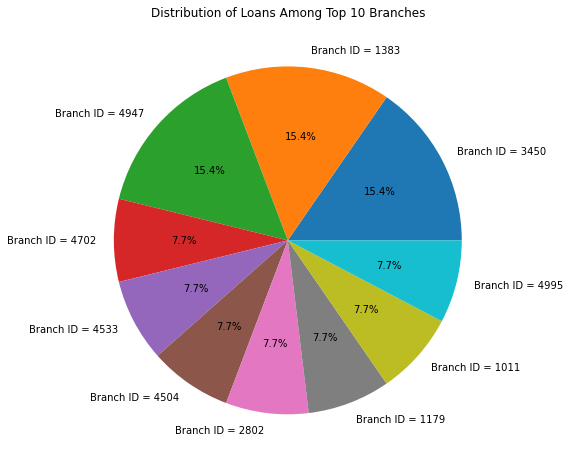

In [11]:
connection = mysql.connector.connect(
    host='localhost',
    database='bank_database',
    user='root',
    password='pramothguhan12'
)

cursor = connection.cursor()

# SQL query to get the number of loans in each branch
query = """
SELECT `BRANCH ID`, COUNT(*) AS NUMBER_OF_LOANS
FROM `LOAN`
GROUP BY `BRANCH ID`
ORDER BY NUMBER_OF_LOANS DESC
LIMIT 10;
"""
cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns=['BRANCH ID', 'NUMBER_OF_LOANS'])

cursor.close()
connection.close()



custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(8, 8))
plt.pie(df['NUMBER_OF_LOANS'], labels = ['Branch ID = ' + str(branch_id) for branch_id in df['BRANCH ID']], autopct='%1.1f%%', colors=custom_colors)
plt.title('Distribution of Loans Among Top 10 Branches')
plt.show()


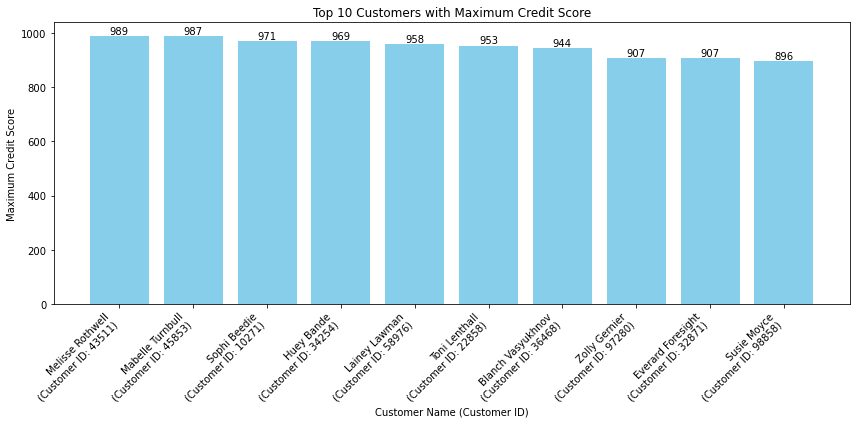

In [12]:
connection = mysql.connector.connect(
    host='localhost',
    database='bank_database',
    user='root',
    password='pramothguhan12'
)


cursor = connection.cursor()

# SQL query to get the top 10 customers with the maximum credit score
query = """
SELECT `CUSTOMER`.`CUSTOMER NAME`, `CREDITCARD`.`CUSTOMER ID`, MAX(`CREDITCARD`.`SCORE`) AS `MAX_CREDIT_SCORE`
FROM `CREDITCARD`
JOIN `CUSTOMER` ON `CREDITCARD`.`CUSTOMER ID` = `CUSTOMER`.`CUSTOMER ID`
GROUP BY `CREDITCARD`.`CUSTOMER ID`, `CUSTOMER`.`CUSTOMER NAME`
ORDER BY `MAX_CREDIT_SCORE` DESC
LIMIT 10;
"""
cursor.execute(query)


data = cursor.fetchall()
df = pd.DataFrame(data, columns=['CUSTOMER NAME', 'CUSTOMER ID', 'MAX_CREDIT_SCORE'])

cursor.close()
connection.close()



x_labels = [f'{name}\n(Customer ID: {customer_id})' for name, customer_id in zip(df['CUSTOMER NAME'], df['CUSTOMER ID'])]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(df)), df['MAX_CREDIT_SCORE'], color='skyblue')
plt.xlabel('Customer Name (Customer ID)')
plt.ylabel('Maximum Credit Score')
plt.title('Top 10 Customers with Maximum Credit Score')
plt.xticks(range(len(df)), x_labels, rotation=45, ha='right')
plt.tight_layout()

for bar, score in zip(bars, df['MAX_CREDIT_SCORE']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score}',
             ha='center', va='bottom', color='black')

plt.show()


In [13]:
connection = mysql.connector.connect(
        host='localhost',
        database='bank_database',
        user='root',
        password='pramothguhan12',
    )

account_df = pd.read_sql("SELECT * FROM ACCOUNT", con=connection)
customer_df = pd.read_sql("SELECT * FROM CUSTOMER", con=connection)
loan_df = pd.read_sql("SELECT * FROM LOAN", con=connection)

account_df['ACCOUNT BALANCE'] = account_df['ACCOUNT BALANCE'].replace('[\$,]', '', regex=True).astype(float)
customer_df['INCOME'] = customer_df['INCOME'].replace('[\$,]', '', regex=True).astype(float)
loan_df['LOAN AMOUNT'] = loan_df['LOAN AMOUNT'].replace('[\$,]', '', regex=True).astype(float)


C:\Users\pramo\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\pramo\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\pramo\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


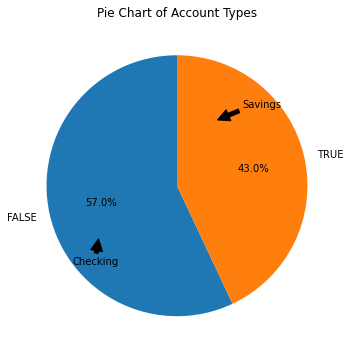

In [14]:
# Pie chart for Account Types
plt.figure(figsize=(8,6))
account_types = account_df['ACCOUNT TYPE'].value_counts()
account_types.plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Pie Chart of Account Types')

plt.annotate('Savings', xy=(0.3, 0.5), xytext=(0.5, 0.6),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Checkin', xy=(-0.6, -0.4), xytext=(-0.8, -0.6),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

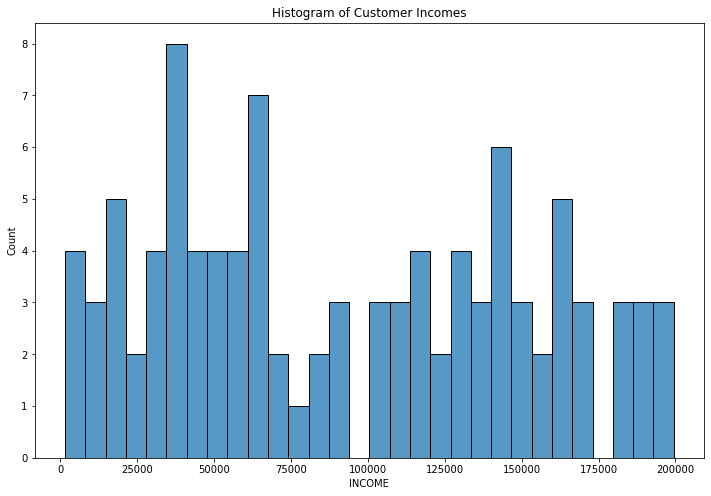

In [15]:
# Histogram for Customer Incomes
plt.figure(figsize=(12, 8))
sns.histplot(customer_df['INCOME'], bins=30, kde=False)
plt.title('Histogram of Customer Incomes')
plt.show()

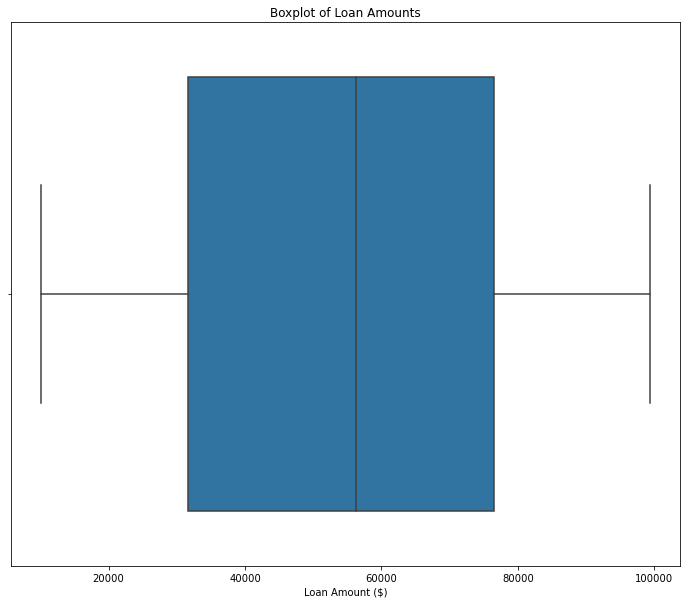

In [16]:
# Boxplot for Loan Amounts
plt.figure(figsize=(12, 10))
sns.boxplot(x=loan_df['LOAN AMOUNT'])
plt.title('Boxplot of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.show()